In [71]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns  
import pydot
from sklearn import tree
import xlrd

# To open Workbook
wb = xlrd.open_workbook('payment.xlsx')
sheet = wb.sheet_by_index(0)

# Get the dataset.
y = []    
row = 1
while True:
    try:
        if sheet.cell_value(row, 0) == '':
            break
        y.append(sheet.cell_value(row, 3))
        row += 1
    except:
        break

x = np.ones((row-1,3))
for t in range(1, row): 
    x[t-1,0] = sheet.cell_value(t, 0)
    x[t-1,1] = sheet.cell_value(t, 1)
    x[t-1,2] = sheet.cell_value(t, 2)
    
x_test = np.ones((1,3))
x_test[0,0] = 0
x_test[0,1] = 2
x_test[0,2] = 3

In [72]:
dtr = DecisionTreeClassifier()
parameters = {'max_leaf_nodes' :[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
print(parameters)
best = GridSearchCV(dtr, parameters, cv=5, verbose=3, n_jobs=-1)

best.fit(x, y)
print(best.best_params_)  # encontrar el mejor parámetro
print(best.best_score_)

{'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'max_leaf_nodes': 10}
0.6470588235294118


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.4s finished
C:\Users\Anabel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [73]:
# Create classifier.
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 10)
# Fit the classifier on the training features and labels.
clf.fit(x, y)
# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(x_test)
print(y_pred)

[0.]


x1: Possui casa própria? (0 não, 1 sim)
x2: Estado civil
x3: Experiência de trabalho


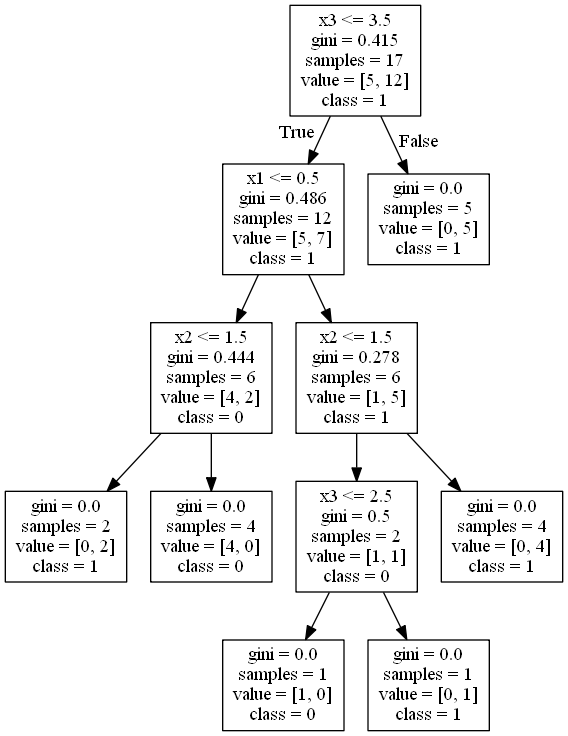

In [75]:
print('x1: Possui casa própria? (0 não, 1 sim)')
print('x2: Estado civil')
print('x3: Experiência de trabalho')

from IPython.display import Image  
from sklearn.externals.six import StringIO
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, class_names=['0','1'], feature_names=['x1','x2','x3'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Acho que NÃO deve-se emprestar o dinheiro a ele